# 2. Linear Regression

## 2.1 Introduction

- Linear regression may be both the simplest and most popular among the standard tools to regression. Dating back to the dawn of the 19th century, linear regression flows from a few simple assumptions:
    1. Linear relationship between independent variables $x$ and dependent variable $y$, in other words, $y$ can be expressed as a weighted sum of elements in $x$ plus some observational noise.
    2. The noise follows a Gaussian distribution $Gaussian(\mu,\sigma)$
    3. Constant variance (homoscedasticity). This means that different values of the response variable have the same variance in their errors, regardless of the values of the predictor variables (which means $\sigma$ above should approximately be a constant value, not a random variable)

## 2.2 Terminology and formulation

- Given the dataset $D := \{(x_i,y_i)\}_{i=1}^n$ with the linear relationship assumption can be expressed as
$$ \begin{eqnarray}
    y_i &&= \beta_0 + \beta_1 x_i^1 + \beta_2 x_i^2 + ... + \beta_d x_i^d + \epsilon_i \\
&&= x_i^T \beta + \epsilon_i,
   \end{eqnarray}$$ 
with $\beta_i \in \mathbb{R}.$

For the pair of data $(x_i,y_i)$ and $x_i = [x_i^1,x_i^2,...,x_i^d]$ or equivalently, the independent variable $x$ has $d$ features, in the matrix form, one has
$$y = X\beta + \epsilon,$$
where $y,\epsilon,\beta \in \mathbb{R}^n, X \in\mathbb{R}^{n\times d}.$
- Note: $\beta$ is representating for the linear relationship between $y,X$, not a set of learned parameters (because we include the noise in the function).

## 2.3 Building the predictor

- We define the model parameter as $\beta = [\beta_0,\beta_1,...,\beta_n]$, and the predicted dependent variable $\hat{y}$. The linear model is defined as
$$ \begin{eqnarray} &&\hat{y}_j = \sum_{i=1}^n x_j^i \cdot \beta_i + \beta_0 \\
                    && \hat{y} = X\beta + \beta_0 
\end{eqnarray} $$

- **Loss function**: in the previous lecture, we learn about the process of measuring the differences. For standard linear regression (you can have different type of linear regression based on the model architecture as well as loss function), the loss function indicates the mean of **Euclidean distance** between predicted - ground truth values

$$\mathbf{L}^i(D,\beta) = \frac{1}{2}||\hat{y}^i-y^i||_2^2$$
$\mathbf{L}^i(D,\beta)$ is the loss function for each pair, the general loss function over the dataset is the average of all the pairs
$$\mathbf{L}(D,\beta)= \frac{1}{2n}\sum_{i=1}^n\mathbf{L}^i(D,\beta) = \frac{1}{2n}\sum_{i=1}^n(\hat{y}^i-y^i)^2$$

## 2.4 Optimization problem
- Another name for linear regression is the process of finding the best fit line, so given our parameter space ($\beta \in \mathbb{R}^d$) we have the optimization problem:
$$\hat{\beta} = argmin_{\beta} \mathbf{L}(D,\beta)$$
- Intuition: we try to find the parameter set that produces the minimal error (loss function).

## 2.5 Solving the problem

### 2.5.1 Analytical solution

- We can rewrite the loss function with the product operator
$$\begin{align*}\mathbf{L}(D,\beta) &= ||X\beta - y||^2 \\
&= (X\beta -y)^T(X\beta -y) \\
&= (\beta^TX^T- y^T)(X\beta -y) \\
&= \beta^TX^TX\beta- \beta^TX^Ty -y^TX\beta + y^Ty \end{align*}$$
- To assure that the solution is a minimizer, we have that the partial derivative $\mathbf{L}(D,\beta)$ with respect to the parameter $\beta$ is 0.
$$\begin{align*}\frac{\partial \mathbf{L}(D,\beta)}{\partial \beta} &= 2\beta^TX^TX -2y^TX\\
&= 0 \end{align*}$$
Then 
$$\begin{align*}
&\Rightarrow y^TX  = \beta^TX^TX \\
&\Rightarrow X^Ty  = XX^T\beta \\
&\Rightarrow \beta = (XX^T)^{-1}X^Ty
\end{align*} $$
- So the analytical solution is
$$\hat{\beta} = (XX^T)^{-1}X^Ty $$
- Note: we solve the equation fairly easily, the analytical solution can be achievable with respect to any differential loss function $\mathbf{L} \in C^1$.

### 2.5.2 Numerical solution

- **Minibatch Gradient Descent**: a batch is a set of $k$ pairs of training samples getting from the dataset, denoted as $B$. The update rule for Minibatch Gradient Descent is
$$\begin{align}\beta_i &= \beta_i  - \frac{\eta}{|B|}\sum_{j\in B}\partial_{\beta_i} \mathbf{L}^i(D,\beta) \\
&= \begin{cases}&\beta_i  - \frac{\eta}{|B|}\sum_{j\in B}x_j(x_j\cdot \beta + \beta_0 - y_j) \text{ for $i\neq0$} \\
&\beta_i  - \frac{\eta}{|B|}\sum_{j\in B}(x_j\cdot \beta +\beta_0 - y_j) \text{ for $i = 0$}\end{cases}\end{align}$$
- **Termination condition**: because the update rule is applied for each batch of each epoch, we can either stop when iterating all the pre-specified number of epochs or loss value < some value $d$. 

### 2.5.3 Discussion

- What to use? pros and cons on each method?

# 2.6 Lab
- **Purpose:** compare the pros and cons between each solving method by implement them.
# 2.6.1 Getting toy data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
######################################## Data preparation #########################################
# PLEASE SET THESE PARAMETERS
file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']
print(X.shape,Y.shape)

(200, 2) (200,)


In [23]:
df.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


## 2.6.2 Visualize dataset

## 2.6.3 Analytical Solution

In [ ]:
# INSERT CODE HERE


## 2.6.4 Inexact solution

In [ ]:
# INSERT CODE HERE
def loss_function(prediction,ground_truth):
    """
    Calculate the MSE loss function
    """
    L = 
    return L

def mini_batch_gradient_descent(X,y,alpha,d, epochs):
    """
    params: given data X, label y, parameter matrix beta, learning step alpha, termination condition d, number of iterations
    output: learned beta, loss value history, gradient history
    """
    # Initialize variables beta, epoch, loss_value
    beta =
    # While loop
    while loss_value<d or epoch<epochs:
        #calulate loss
        
        #calculate gradient
        
        #update beta, epoch
    
    return beta, loss_history, gradient_history

## 2.6.5 Comments
- Please write up some analysis/comments on the results

# Some nice visualization to provide intuition

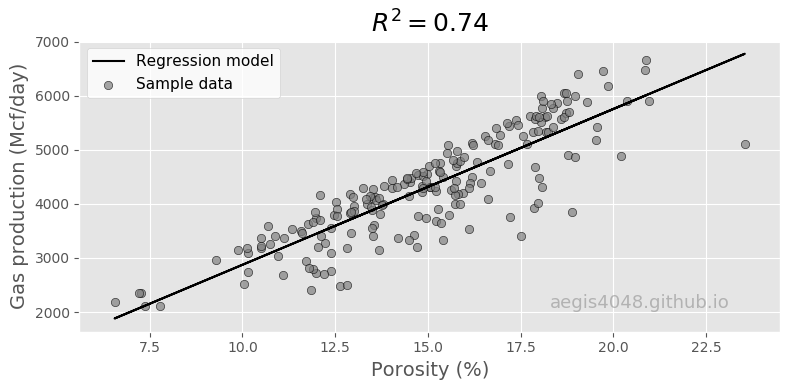

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

NameError: name 'x' is not defined

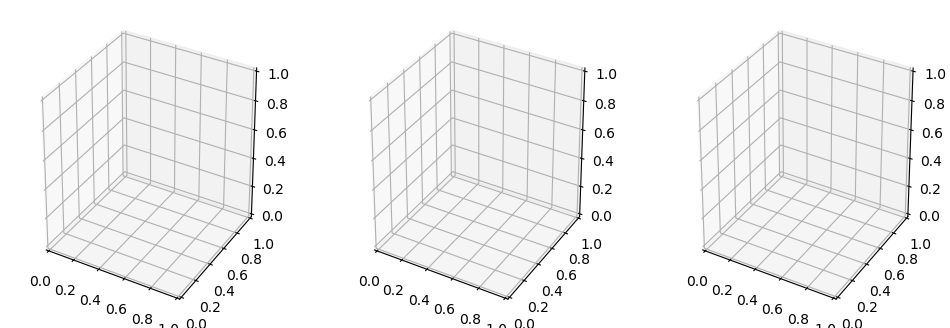

In [29]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [25]:
# https://github.com/tensorflow/playground